In [77]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [49]:
df = pd.read_csv('train.csv')
df.set_index('PassengerId', inplace = True)
dff = pd.read_csv('test.csv')

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Exploring the Data

In [50]:
print(f'the train test shapes are {df.shape} and {dff.shape} respectively')

the train test shapes are (891, 11) and (418, 11) respectively


### Survivors

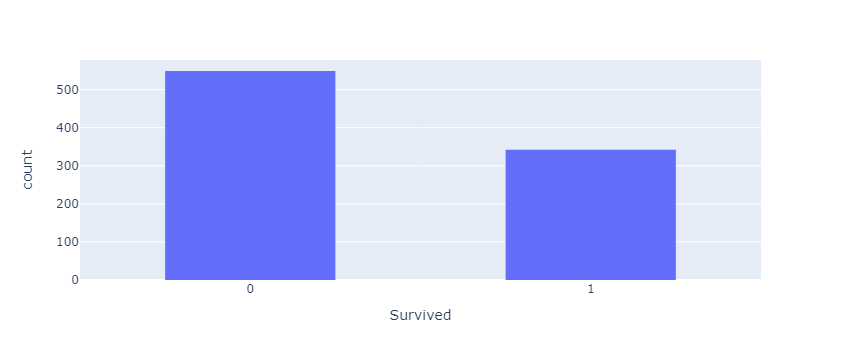

In [71]:
fig = px.histogram(df, x='Survived')
fig.update_layout(bargap=0.5)
fig.update_xaxes(type='category')

### Pclass

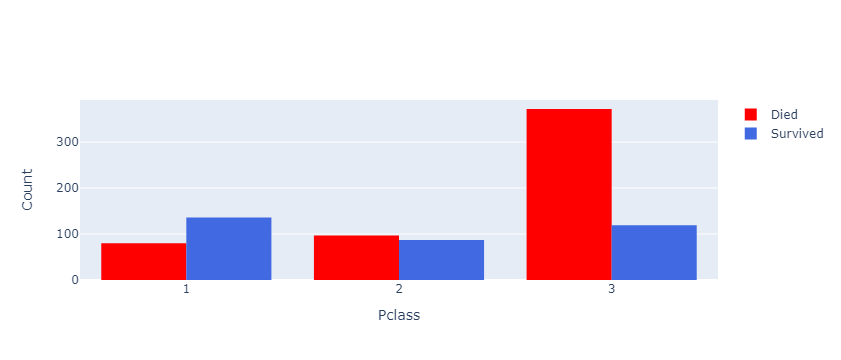

In [147]:
fig = go.Figure(data =
                        px.histogram(df[df['Survived']==0], x='Pclass').data 
                        + px.histogram(df[df['Survived']==1], x='Pclass').data )
fig.update_layout(
    xaxis_title="Pclass",
    yaxis_title="Count",
)
fig.update_xaxes(type='category', categoryarray = [1,2,3])

fig.data[0].name= 'Died'
fig.data[0].showlegend= True
fig.data[0].marker = {'color':'red'}
fig.data[1].name= 'Survived'
fig.data[1].showlegend= True
fig.data[1].marker = {'color':'royalblue'}

fig

In [199]:
# df.groupby(['Pclass','Survived'])['Survived'].count().unstack('Survived')
tmp = pd.crosstab(df['Pclass'], df['Survived'])
tmp['Total'] = df.groupby(['Pclass'])['Survived'].count()
tmp['Survival %'] = round(df.groupby(['Pclass'])['Survived'].mean()*100,2)
tmp

Survived,0,1,Total,Survival %
Pclass,,,,
1,80,136,216,62.96
2,97,87,184,47.28
3,372,119,491,24.24


### Name

Probably the hardest feature to make useful without in-depth knowledge of the origins of these names. I think the best I could do is look at how many unique names there are, and what are these people's titles. I suspect titles may give some insight as to how they'd <act/be treated> during the emergency.

Mr. and Mrs. shows an interesting pattern, Master and Miss slightly less so


In [467]:
df['surname'] = df['Name'].str.split(',')[:].str[0]
dff['surname'] = dff['Name'].str.split(',')[:].str[0]

df[df.groupby('surname')['surname'].transform('size')>2]['surname'].value_counts()

Andersson        9
Sage             7
Panula           6
Goodwin          6
Skoog            6
Carter           6
Johnson          6
Rice             5
Ford             4
Brown            4
Lefebre          4
Smith            4
Palsson          4
Kelly            4
Hart             4
Williams         4
Harper           4
Harris           4
Asplund          4
Fortune          4
Baclini          4
Gustafsson       4
Elias            3
Flynn            3
Davies           3
Richards         3
Allison          3
Thayer           3
Hansen           3
Graham           3
Taussig          3
Van Impe         3
Collyer          3
Moran            3
Hoyt             3
Newell           3
Bourke           3
O'Brien          3
Goldsmith        3
Olsen            3
Navratil         3
Boulos           3
Hickman          3
Jussila          3
Johansson        3
West             3
Laroche          3
Meyer            3
Vander Planke    3
Jensen           3
Name: surname, dtype: int64

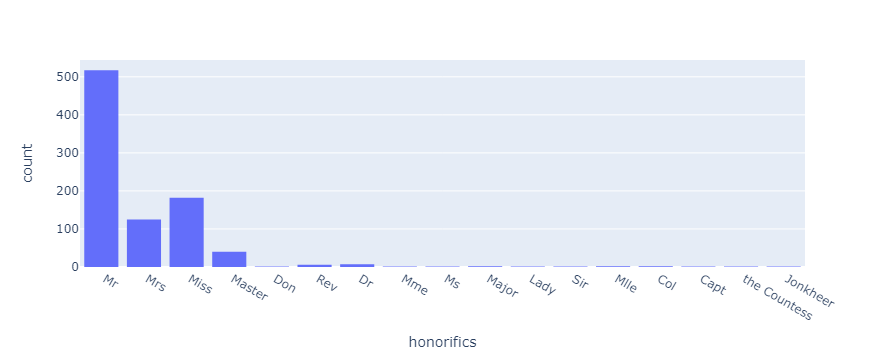

In [469]:
df['honorifics'] = df['Name'].str.split(',')[:].str[1].str.split('.')[:].str[0]
dff['honorifics'] = dff['Name'].str.split(',')[:].str[1].str.split('.')[:].str[0]

px.histogram(df, x= df['honorifics'])

In [440]:
tmp = pd.crosstab(df['honorifics'], df['Survived'])
tmp['Total'] = df.groupby(['honorifics'])['Survived'].count()
tmp['Survival %'] = round(df.groupby(['honorifics'])['Survived'].mean()*100,2)
tmp

Survived,0,1,Total,Survival %
honorifics,,,,
Capt,1,0,1,0.00
Col,1,1,2,50.00
Don,1,0,1,0.00
Dr,4,3,7,42.86
Jonkheer,1,0,1,0.00
Lady,0,1,1,100.00
Major,1,1,2,50.00
Master,17,23,40,57.50
Miss,55,127,182,69.78


### Sex 

"put the women and children in and lower away"

The first and second officers (William McMaster Murdoch and Lightoller) interpreted the evacuation order differently; Murdoch took it to mean women and children first, while Lightoller took it to mean women and children only. As a consequence, 74% of the women and 52% of the children on board were saved, but only 20% of the men.

Quoted from Wikipedia, so yes, your sex should matter a lot

In [272]:
tmp = pd.crosstab(df['Sex'], df['Survived'])
tmp['Total'] = df.groupby(['Sex'])['Survived'].count()
tmp['Passenger Sex % Distribution'] = round((df.groupby(['Sex'])['Survived'].count() / df.groupby(['Sex'])['Survived'].count().sum())*100,2)
tmp['Survival %'] = round(df.groupby(['Sex'])['Survived'].mean()*100,2)
tmp

Survived,0,1,Total,Passenger Sex % Distribution,Survival %
Sex,,,,,
female,81,233,314,35.24,74.20
male,468,109,577,64.76,18.89


### Age

At a glance, it appears that survivors and victims have a similar mean (exact same median) and a flipped Q1/Q3, implying you could somewhat fit a Gaussian with flipped skews. As I would personally expect, the younger age group has a higher chance of survival in contrast to the older age group, f(x) = 1/x behavior somewhat. 

In [404]:
df[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,CabinLoc
PassengerId,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,NaN
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Williams,NaN
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Masselmani,NaN
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Emir,NaN
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,O'Dwyer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Razi,NaN
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,NaN
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,van Melkebeke,NaN


In [338]:
tmp = pd.DataFrame(pd.crosstab(df['Survived'], pd.cut(df['Age'], 8)))
tmp = tmp.T
tmp['Survival Ratio'] = tmp[1]/(tmp[0]+tmp[1])
tmp

Survived,0,1,Survival Ratio
Age,,,
"(0.34, 10.368]",26,38,0.593750
"(10.368, 20.315]",71,44,0.382609
"(20.315, 30.263]",146,84,0.365217
"(30.263, 40.21]",86,69,0.445161
"(40.21, 50.158]",53,33,0.383721
"(50.158, 60.105]",25,17,0.404762
"(60.105, 70.052]",13,4,0.235294
"(70.052, 80.0]",4,1,0.200000


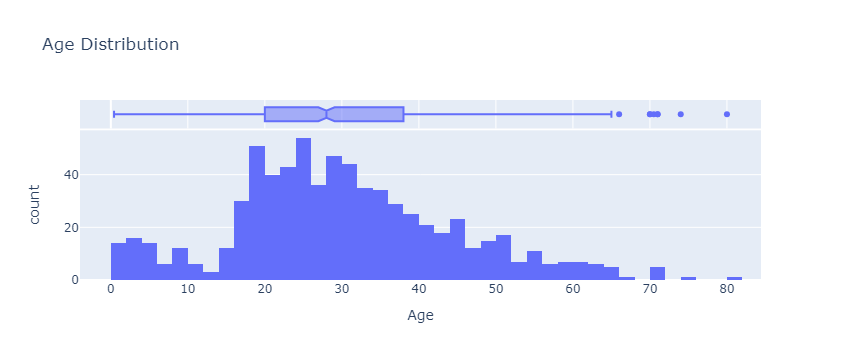

In [318]:
px.histogram(df, x='Age', title='Age Distribution', marginal = 'box')

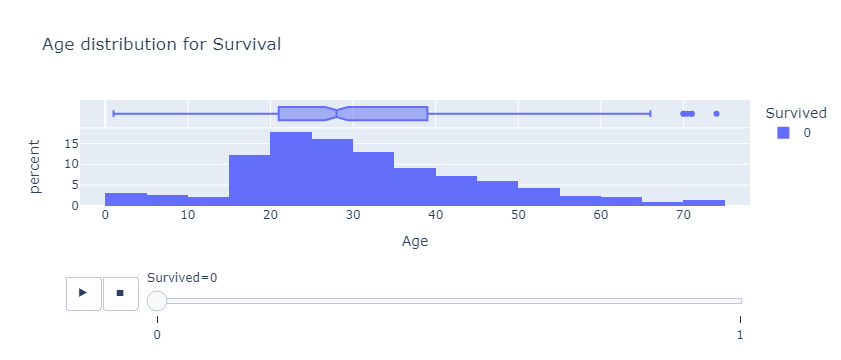

In [346]:
px.histogram(df, x='Age', color='Survived', animation_frame ='Survived', 
             marginal = 'box', nbins = 25, histnorm='percent',
            title='Age distribution for Survival' )

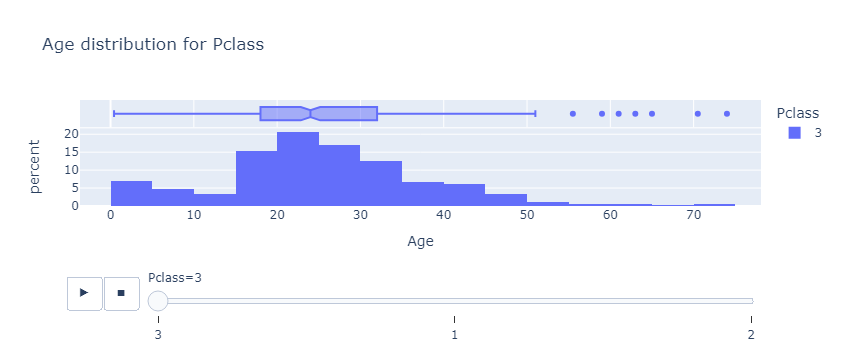

In [351]:
px.histogram(df, x='Age', color='Pclass', animation_frame ='Pclass', 
             marginal = 'box', nbins = 25, histnorm='percent',
            title='Age distribution for Pclass' )

### SibSp

Strangely enough, the more siblings you have, the more likely it is that all of them were victims. Perhaps this may be related to how 1st class has the lowest proportion of kids, and 3rd having the highest

In [344]:
tmp = pd.crosstab(df['SibSp'], df['Survived'])
tmp['Total'] = df.groupby(['SibSp'])['Survived'].count()
tmp['Survival %'] = round(df.groupby(['SibSp'])['Survived'].mean()*100,2)
tmp

Survived,0,1,Total,Survival %
SibSp,,,,
0,398,210,608,34.54
1,97,112,209,53.59
2,15,13,28,46.43
3,12,4,16,25.00
4,15,3,18,16.67
5,5,0,5,0.00
8,7,0,7,0.00


### Parch

How many parents and/or children do you have with you. Seems like most people were just couples. Not really sure if this helps in predicting survival.

In [345]:
tmp = pd.crosstab(df['Parch'], df['Survived'])
tmp['Total'] = df.groupby(['Parch'])['Survived'].count()
tmp['Survival %'] = round(df.groupby(['Parch'])['Survived'].mean()*100,2)
tmp

Survived,0,1,Total,Survival %
Parch,,,,
0,445,233,678,34.37
1,53,65,118,55.08
2,40,40,80,50.00
3,2,3,5,60.00
4,4,0,4,0.00
5,4,1,5,20.00
6,1,0,1,0.00


### Ticket & Fare

I probably would drop Ticket data in favor of using the fare or embarked port.

In [355]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

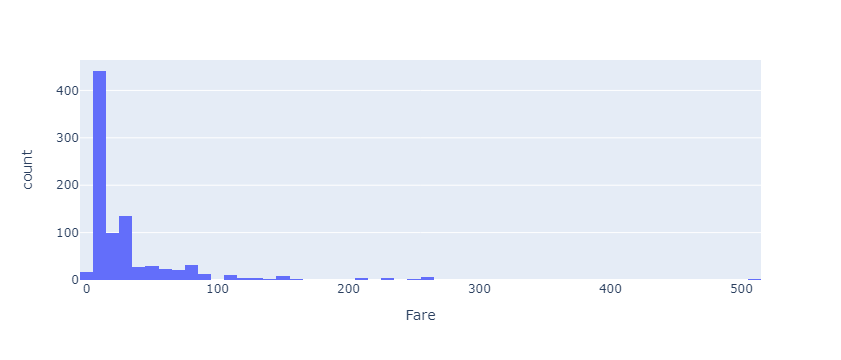

In [369]:
px.histogram(df, x='Fare')

### Cabin

Considering my personal experience with hotel naming conventions, the alphabet + number combination SHOULD follow some logical order. Unfortunately...
1. there's a lot of nans here
2. we actually don't know whether the numerical position of it can be treated as numerical (i.e. the numbering could be indicative of the distance to an entrace or something)

oh hey! if we ignore the fact that our cabin data is like 20% filled only, the survival % follows a fairly gaussian curve, centered around D-E. Very interesting

In [468]:
df['CabinLoc'] = df['Cabin'].dropna().str[0]
df['CabinLoc'] = df['CabinLoc'].astype('category')

dff['CabinLoc'] = dff['Cabin'].dropna().str[0]
dff['CabinLoc'] = dff['CabinLoc'].astype('category')
# df = df.drop(['Cabin', 'CabinLoc'], axis = 1 ) 

tmp = pd.crosstab(df['CabinLoc'], df['Survived'])
tmp['Total'] = df.groupby(['CabinLoc'])['Survived'].count()
tmp['Survival %'] = round(df.groupby(['CabinLoc'])['Survived'].mean()*100,2)
tmp

Survived,0,1,Total,Survival %
CabinLoc,,,,
A,8,7,15,46.67
B,12,35,47,74.47
C,24,35,59,59.32
D,8,25,33,75.76
E,8,24,32,75.00
F,5,8,13,61.54
G,2,2,4,50.00
T,1,0,1,0.00


### Port of Embarkation 

At a glance, I'd say the discrepancy in survival rate has to do with the class. I suspect the Southampton & Queesntown port is filled with emigrants (who are normally the 3rd class) and Cherbourg to be the home of the rich lads.


In [370]:
tmp = pd.crosstab(df['Embarked'], df['Survived'])
tmp['Total'] = df.groupby(['Embarked'])['Survived'].count()
tmp['Survival %'] = round(df.groupby(['Embarked'])['Survived'].mean()*100,2)
tmp

Survived,0,1,Total,Survival %
Embarked,,,,
C,75,93,168,55.36
Q,47,30,77,38.96
S,427,217,644,33.70


In [366]:
tmp = pd.crosstab(df['Embarked'], df['Pclass'])
tmp['Total'] = df.groupby(['Embarked'])['Pclass'].count()
tmp

Pclass,1,2,3,Total
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644


## Generalised Correlation

Class and Fare are correlated, both of which corresponds to a higher survival rate. 

Your sex matters a LOT. 

Age has a surprisingly low correlation to your survivability.

In [441]:
# let's convert sex into a numerical data to be included in the correlation plot 

df.loc[ df['Sex'] == 'male' ,'Sex'] = 1
df.loc[ df['Sex'] == 'female' ,'Sex'] = 0
df['Sex'] = df['Sex'].astype(int)

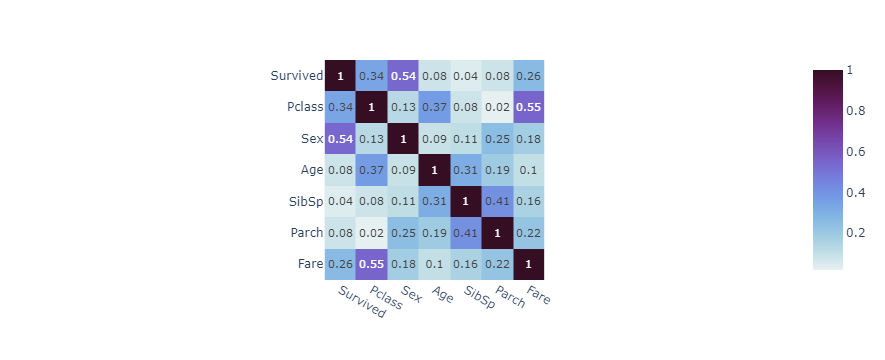

In [442]:
px.imshow(df.corr(numeric_only = True).abs().round(2), color_continuous_scale= 'dense', text_auto=True)

## Preparing the data 

Age - quite a bit of missing data here, I think we should leverage the fact that we have their class, and sex to impute the mean 

Cabin - I'm dropping this, but the cabinloc might be useful

Fare - one missing data in test, I'll give it the median

Embarked - two missing in train, 

In [470]:
tmp = pd.DataFrame(df.isnull().sum(), columns = ['train'])
tmp['test'] = dff.isnull().sum()
tmp

,train,test
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,86.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,1.0
Cabin,687,327.0


Sex  Pclass
0    1         35.0
     2         28.0
     3         21.5
1    1         40.0
     2         30.0
     3         25.0
Name: Age, dtype: float64


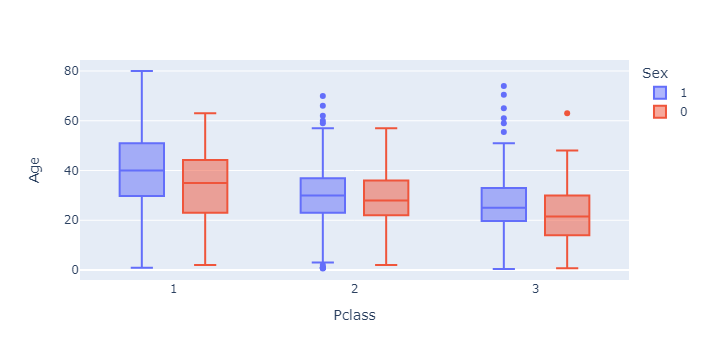

In [478]:
print(df.groupby(['Sex', 'Pclass'])['Age'].median())
px.box(df , x = 'Pclass', y='Age', color='Sex')

In [41]:

df = df.drop(['Name', 'Ticket', 'Cabin'], axis = 1 ) 

In [45]:
df.loc[df['Age'].isna(),'Age'] = df['Age'].mean()

df[df.isna().any(axis=1)]

df.dropna(axis = 1) 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500


C:\Users\Sharks & Bears\AppData\Local\Temp\ipykernel_23268\1133772998.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



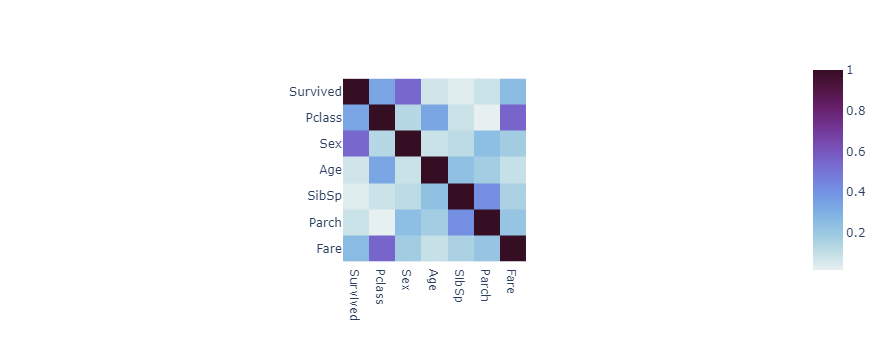

In [49]:
px.imshow(df.corr().abs(), color_continuous_scale= 'dense')

## Random Forests 

In [50]:
def entropy(p):
    if p == 0 or p ==1:
        return 0
    else:
        return -p * np.emath.logn(2, p) - (1-p) * np.emath.logn(2, 1-p )

In [51]:
p = 0.3


## NN Stuff

In [15]:
# import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Input(shape=(8)),
#     Dense(units = 20, activation = 'relu'),
#     Dense(units = 20, activation = 'relu'),
#     Dense(units = 20, activation = 'relu'),
#     Dense(units = 1, activation = 'sigmoid'),
# ])

# model.summary()

# model.compile(loss = BinaryCrossentropy(), optimizer=Adam(0.001))

# X_col = df.columns.drop('Survived')
# y_col = ['Survived']

# df[X_col]

# for txt in ['Pclass', 'Embarked', 'Sex']:
#     df[txt] = df[txt].astype('category')
    
# for txt in ['SibSp', 'Parch', 'Survived']:
#     df[txt] = df[txt].astype('float32')
